## 作業

1. 如何使用已經訓練好的模型？

透過 convert.py -w 參數，將已訓練好的yolov3權重檔轉為keras訓練用模型，再以此keras模型繼續訓練自己的資料集

2. 依照 https://github.com/qqwweee/keras-yolo3 的程式碼，請敘述，訓練模型時，資料集的格式是什麼？具體一點的說，要提供什麼格式的文件來描述資料集的圖片以及 bboxes 的信息呢？

VOC2007格式所產生標註檔(.xml)內容為PASCAL格式，和YOLO(.txt)格式不同。要將VOC labels轉換為YOLO格式。

第一欄：類別代碼

第二欄：物件中心x位在整張圖片x的比例

第三欄：物件中心y位在整張圖片y的比例

第四欄：物件寬度w佔整張圖片寬度的比例

第五欄：物件長度h佔整張圖片長度的比例



In [1]:
%tensorflow_version 1.x # 確保 colob 中使用的 tensorflow 是 1.x 版本而不是 tensorflow 2
import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: `1.x` or `2.x`.
You set: `1.x # 確保 colob 中使用的 tensorflow 是 1.x 版本而不是 tensorflow 2`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.
1.15.0


In [2]:
pip install keras==2.2.4 # 需要安裝 keras 2.2.4 的版本

     |████████████████████████████████| 317kB 2.8MB/s 
  Found existing installation: Keras 2.2.5
    Uninstalling Keras-2.2.5:
      Successfully uninstalled Keras-2.2.5


In [3]:
from google.colab import drive 
drive.mount('/content/gdrive') # 將 google drive 掛載在 colob，
# 下載基於 keras 的 yolov3 程式碼
%cd 'gdrive/My Drive'
# !git clone https://github.com/qqwweee/keras-yolo3 # 如果之前已經下載過就可以註解掉
%cd keras-yolo3

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive
/content/gdrive/My Drive/keras-yolo3


In [0]:
from PIL import Image
image = Image.open('dog.jpg') 

In [7]:
from yolo import YOLO
yolo = YOLO()
r_image = yolo.detect_image(image)

model_data/yolo.h5 model, anchors, and classes loaded.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
(416, 416, 3)
Found 3 boxes for img
dog 0.99 (128, 224) (314, 537)
truck 0.91 (475, 85) (689, 170)
bicycle 0.99 (162, 119) (565, 441)
8.723542617000021


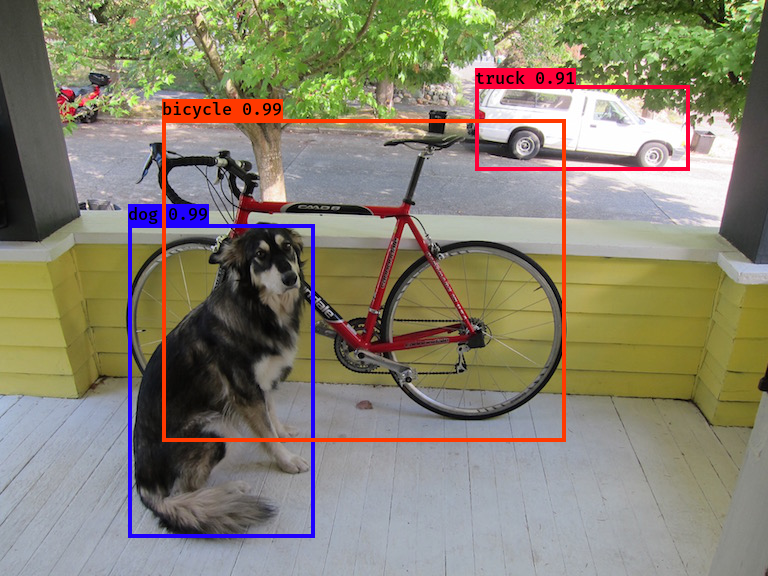

In [8]:
r_image